# Предсказательная модель для диагностирования рака по визуальным характеристикам опухоли

Датасет взят с источника: https://www.kaggle.com/datasets/erdemtaha/cancer-data/code

## Предварительный анализ датасета

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('Cancer_Data.csv')
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Переменная diagnosis является целевой. Значение "B" - доброкачественная опухоль, "M" - злокачественная опухоль (рак).

In [8]:
df.shape

(569, 33)

In [9]:
duplicateRows = df[df.duplicated()]
len(duplicateRows)

0

Дубликаты отсутствуют.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Признак Unnamed: 32 состоит полностью из пустых значений и не несет никакой полезной информации. Его можно удалить.

In [18]:
len(df['id'].unique()) == df.shape[0]

True

Все id уникальные. Можно сделать вывод, что признак id также не несет никакой полезной информации для модели классификатора.

In [19]:
df = df.drop(['id', 'Unnamed: 32'], axis = 1)
df['diagnosis'].replace(['B', 'M'],
                        [0, 1], inplace=True)
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

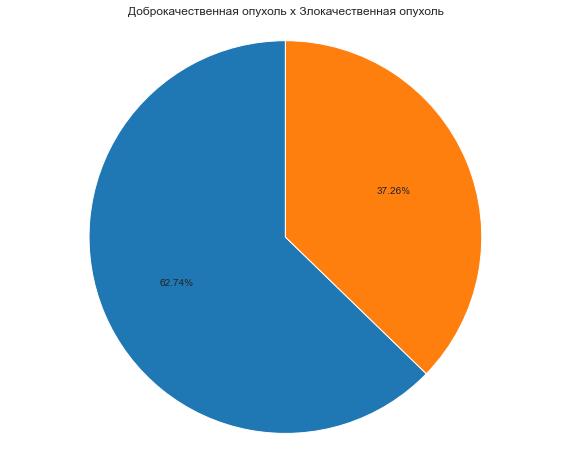

In [31]:
plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
plt.pie(df['diagnosis'].value_counts(),autopct='%1.2f%%', startangle=90)
plt.axis('equal')
plt.title("Доброкачественная опухоль x Злокачественная опухоль")
plt.show();

Наблюдается небольшой дисбаланс классов.

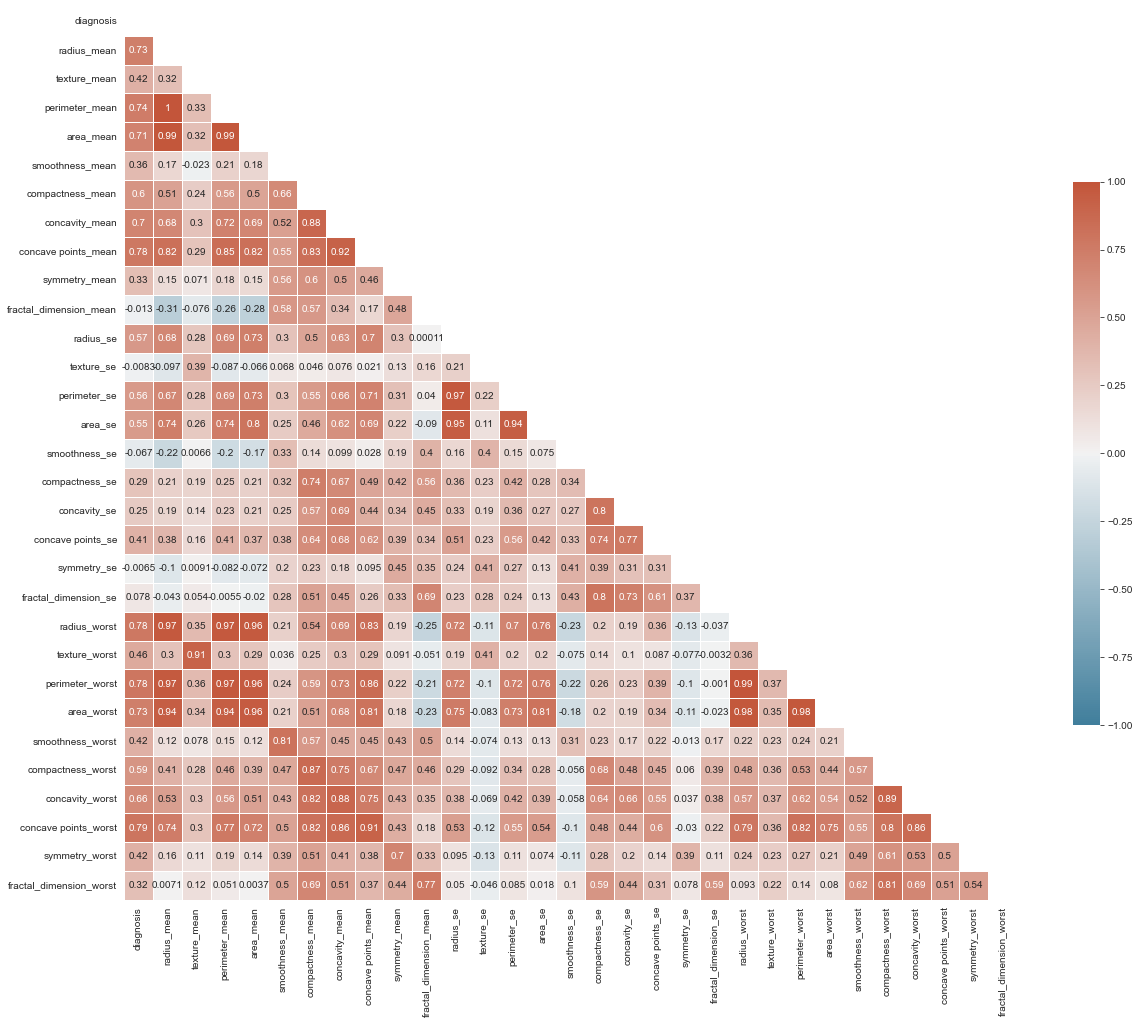

In [36]:
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(20, 20))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, 
            annot=True, 
            center=0, vmin=-1, vmax=1,
           )
plt.show()

Имеются признаки, между которыми наблюдается довольно высокая корреляция. Возможно, это будет ухудшать качество модели.

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [38]:
X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

object = StandardScaler() 
X_train = object.fit_transform(X_train)

X_test = object.transform(X_test)

Подберем несколько алгоритмов классификации, выбрав лучшие из предложенных библиотекой LazyClassifier и затем подберем для них гиперпараметры по сетке для улучшения качества модели.

In [44]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 43.95it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LogisticRegression,0.98,0.98,0.98,0.98,0.02
SVC,0.98,0.98,0.98,0.98,0.01
XGBClassifier,0.97,0.98,0.98,0.97,0.04
LGBMClassifier,0.98,0.98,0.98,0.98,0.07
AdaBoostClassifier,0.98,0.97,0.97,0.98,0.09
LinearSVC,0.97,0.97,0.97,0.97,0.01
ExtraTreesClassifier,0.97,0.97,0.97,0.97,0.07
CalibratedClassifierCV,0.98,0.97,0.97,0.98,0.03
KNeighborsClassifier,0.97,0.97,0.97,0.97,0.01


In [45]:
predictions

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LogisticRegression,0.98,0.98,0.98,0.98,0.02
SVC,0.98,0.98,0.98,0.98,0.01
XGBClassifier,0.97,0.98,0.98,0.97,0.04
LGBMClassifier,0.98,0.98,0.98,0.98,0.07
AdaBoostClassifier,0.98,0.97,0.97,0.98,0.09
LinearSVC,0.97,0.97,0.97,0.97,0.01
ExtraTreesClassifier,0.97,0.97,0.97,0.97,0.07
CalibratedClassifierCV,0.98,0.97,0.97,0.98,0.03
KNeighborsClassifier,0.97,0.97,0.97,0.97,0.01


Значения метрик получились довольно хорошими для большей части алгоритмов. Выберем среди них наиболее быстрые для подбора гиперпараметров по сетке (по 5 фолдам): логистическая регрессия, SVC, XGBClassifier, а также случайный лес (т.к. возможно после подбора гиперпараметров, получится увеличить значения метрик), и SGD (т.к. при такиж же значениях метрик, как и для случайного леса, скорость его работы сильно выше).

## Построение моделей

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.linear_model import SGDClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [75]:
def print_metrics(y_pred, y_test):
    accuracy = accuracy_score(y_pred, y_test)
    precision = precision_score(y_pred, y_test)
    recall = recall_score(y_pred, y_test)
    roc_auc = roc_auc_score(y_pred, y_test)
    f1 = f1_score(y_pred, y_test)

    print(f'accuracy = {round(accuracy, 2)}\nprecision = {round(precision, 2)}\n\
recall = {round(recall, 2)}\nroc_auc = {round(roc_auc, 2)}\nf1 = {round(f1, 2)}')

#### Логистическая регрессия

In [96]:
lr = LogisticRegression()
C = range(1,100)
penalties = ['l2', 'l1', 'elasticnet', None]


param_grid = dict(penalty = penalties, C=C)
grid = GridSearchCV(lr, param_grid, cv=5, scoring='f1', return_train_score=True)

grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9692517969382838
{'C': 1, 'penalty': 'l2'}
LogisticRegression(C=1)


In [53]:
#уточним лучшее значение C

lr = LogisticRegression()
C = [0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8]
penalties = ['l2', 'l1', 'elasticnet', None]


param_grid = dict(penalty = penalties, C=C)
grid = GridSearchCV(lr, param_grid, cv=5, scoring='f1', return_train_score=True)

grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9692517969382838
{'C': 0.8, 'penalty': 'l2'}
LogisticRegression(C=0.8)


In [97]:
%%time

lr = LogisticRegression(C = 0.8, penalty = 'l2')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print_metrics(y_pred, y_test)

accuracy = 0.99
precision = 0.97
recall = 1.0
roc_auc = 0.99
f1 = 0.98
CPU times: total: 0 ns
Wall time: 14 ms


Получили более высокие значения метрик. Стоит также обратить внимание, что метрика recall имеет значение 1.0, что очень важно при диагностировании такого серьезного заболевания как рак. Высокое значение recall говорит о том, что в ряде случаев наша модель может выставлять ложно положительный результат, однако при этом мы можем иметь большую уверенность в том, что люди с истинно положительным результатом анализа будут реже получать ложноотрицательный результат и этому стоит отдать предпочтение. Ведь в случае ложноположительного результата всегда есть возможность сделать ещё 1 анализ и пройти дополнительные медицинские обследования, которые смогут опровергнуть заболевание. Куда страшнее, если человеку с заболеванием не поставить диагноз, ведь в этом случае будет потеряно ценное время, в которое ещё можно предпринять какие-либо меры для лечения. К тому же на начальных стадиях рак протекает безболезненно, а когда уже начиются боли, то может быть уже поздно.

Логистическая регрессия дала очень хороший результат.

#### Стохастический градиентный спуск (SGD)

In [55]:
sgd = SGDClassifier()

losses = ["hinge", "modified_huber", "log"]
penalties = ['l2', 'l1', 'elasticnet', None]

sgd = SGDClassifier()
param_grid = dict(loss=losses, penalty = penalties)

grid = GridSearchCV(sgd, param_grid, cv=5, scoring='f1', return_train_score=True)
grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9459848042080654
{'loss': 'hinge', 'penalty': None}
SGDClassifier(penalty=None)


In [98]:
%%time

sgd = SGDClassifier(loss = 'hinge', penalty = None)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)

print_metrics(y_pred, y_test)

accuracy = 0.96
precision = 0.98
recall = 0.91
roc_auc = 0.95
f1 = 0.95
CPU times: total: 0 ns
Wall time: 4.99 ms


Алгоритм SGD дал результат хуже логистической регрессии.

#### Метод опорных векторов (SVC)

In [60]:
svc = svm.SVC()

C = range(1,100)

param_grid = dict(C=C)
grid = GridSearchCV(svc, param_grid, cv=5, scoring='f1', return_train_score=True)

grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9484331518451301
{'C': 1}
SVC(C=1)


In [61]:
svc = svm.SVC()

C = [0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8]

param_grid = dict(C=C)
grid = GridSearchCV(svc, param_grid, cv=5, scoring='f1', return_train_score=True)

grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9515969936530396
{'C': 0.8}
SVC(C=0.8)


In [99]:
%%time

svc = svm.SVC(C=0.8)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print_metrics(y_pred, y_test)

accuracy = 0.98
precision = 0.95
recall = 0.98
roc_auc = 0.98
f1 = 0.97
CPU times: total: 0 ns
Wall time: 10 ms


Получили хорошие результаты, но всё же хуже, чем у логистической регрессии.

#### Случайный лес

In [92]:
rf = RandomForestClassifier(n_estimators = 50, n_jobs = -1, random_state = 20)

param_grid = [
    {
        'max_depth':[i for i in range(1, 7)],
        'n_estimators': [i for i in range(1, 70)]
    }]

grid = GridSearchCV(rf, param_grid, n_jobs = -1, cv=5, scoring='roc_auc', return_train_score=True)

grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9923724137931036
{'max_depth': 5, 'n_estimators': 20}
RandomForestClassifier(max_depth=5, n_estimators=20, n_jobs=-1, random_state=20)


In [93]:
rf = RandomForestClassifier(n_estimators = 20, max_depth = 5, n_jobs = -1, random_state = 20)

param_grid = [
    {
        'min_samples_split': [i for i in range(1,100)]
    }]

grid = GridSearchCV(rf, param_grid, n_jobs = -1, cv=5, scoring='roc_auc', return_train_score=True)

grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9923724137931036
{'min_samples_split': 2}
RandomForestClassifier(max_depth=5, n_estimators=20, n_jobs=-1, random_state=20)


In [100]:
%%time

rf = RandomForestClassifier(n_estimators = 20, max_depth = 5, min_samples_split = 2, random_state = 20)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print_metrics(y_pred, y_test)

accuracy = 0.94
precision = 0.95
recall = 0.88
roc_auc = 0.93
f1 = 0.92
CPU times: total: 0 ns
Wall time: 25 ms


Модель случайного леса дала не очень хороший результат по сравнению с другими. Особенно следует обратить внимание на довольно низкое значение метрики recall.

#### XGBoost

In [106]:
clf = xgb.XGBClassifier(learning_rate=0.1,
                          n_estimators=20,
                          objective= 'binary:logistic',
                          nthread=-1,
                          scale_pos_weight=1,
                          seed=27)

param_test = {
    'max_depth':range(1, 7),
    'n_estimators': [i for i in range(1, 70)]
}

grid = GridSearchCV(estimator=clf, 
                        param_grid=param_test,
                        scoring='f1',
                        n_jobs=-1,
                        cv=5)

grid.fit(X_train, y_train)

grid.best_params_, grid.best_score_

({'max_depth': 3, 'n_estimators': 60}, 0.9443704059208364)

In [107]:
clf = xgb.XGBClassifier(learning_rate=0.1,
                          n_estimators=60,
                          max_depth = 3,
                          objective= 'binary:logistic',
                          nthread=-1,
                          scale_pos_weight=1,
                          seed=27)

param_test = {
    'min_child_weight': [i for i in range(1, 20)]
}

grid = GridSearchCV(estimator=clf, 
                        param_grid=param_test,
                        scoring='f1',
                        n_jobs=-1,
                        cv=5)

grid.fit(X_train, y_train)

grid.best_params_, grid.best_score_

({'min_child_weight': 1}, 0.9443704059208364)

In [108]:
%%time

clf = xgb.XGBClassifier(learning_rate=0.1,
                          n_estimators=60,
                          max_depth = 3,
                          min_child_weight = 1,
                          objective= 'binary:logistic',
                          nthread=-1,
                          scale_pos_weight=1,
                          seed=27)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print_metrics(y_pred, y_test)

accuracy = 0.98
precision = 0.98
recall = 0.95
roc_auc = 0.97
f1 = 0.97
CPU times: total: 172 ms
Wall time: 27.6 ms


## Вывод

Наиболее точные результаты получилось достигнуть при помощи алгоритма логистической регрессии. К тому же большим плюсом для данного случая является Высокое значение метрики Recall, а также довольно быстрая производительность.

**Полученные значения метрик:**

accuracy = 0.99
precision = 0.97
recall = 1.0
roc_auc = 0.99
f1 = 0.98

**Время обучения и тестирования:**

CPU times: total: 0 ns
Wall time: 14 ms